In [153]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
import matplotlib.pyplot as plt


In [154]:
data=pd.read_table('C:/Users/saragada/Desktop/HPI/Forecast/bw/bw.data', sep='\034',encoding='latin-1',error_bad_lines=False)

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (0,2,10,26,39,40,41,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.



In [73]:
from datetime import datetime
from dateutil import relativedelta

months=list()
#This will find the difference between the two dates
for i in range(0,len(data)):
    difference = relativedelta.relativedelta(datetime.strptime(data['VAL_DT'][i],'%Y-%m-%d'),datetime.strptime(data['POST_DT'][i],'%Y-%m-%d'))
    months.append(difference.months)



In [74]:
data['Category']=months

In [81]:
a=data['Category'].unique()

In [82]:
a

array([  1,   0,   2,   3,  -2,   4,  -1,  -7,  -3,  10,   9,  -4,   8,
        -6,   6,   5,  -5,  11,  -8,  -9,   7, -11, -10], dtype=int64)

In [85]:
for i in a:
    datak=data[data['Category']==i]
    datak.to_csv('C:/Users/saragada/Desktop/HPI/Fresh Start Forecast/Data/dataslice'+str(i)+'.csv')

In [86]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [88]:
dataF=pd.read_csv('C:/Users/saragada/Desktop/HPI/Fresh Start Forecast/Data/dataslice1.csv',encoding='latin-1')

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (1,11,27,40,41,42,48,52,53,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.



In [89]:
df=data.groupby('VAL_DT', as_index=False).agg({"USD_AMT": "sum"})
df=df.reset_index()

In [92]:
df=df[['VAL_DT','USD_AMT']]

In [94]:
df.rename(columns={'VAL_DT': 'ds', 'USD_AMT': 'y'}, inplace=True)

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [95]:
data=df

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\fbprophet\forecaster.py:773: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



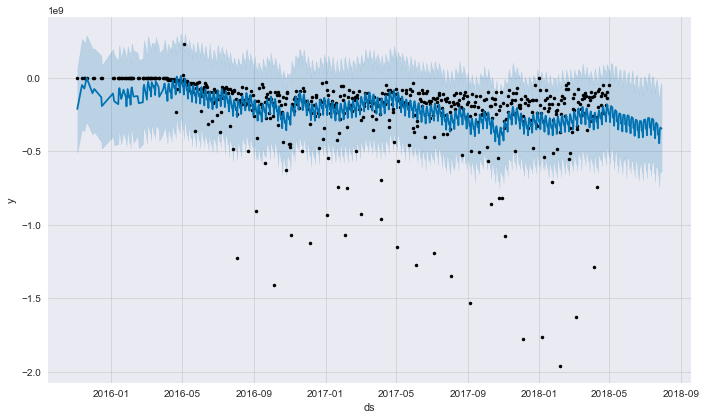

In [150]:
m = Prophet(changepoint_prior_scale=0.01).fit(data)
future = m.make_future_dataframe(periods=90, freq='D')
fcst = m.predict(future)
m.plot(fcst)



In [152]:
fcst

ds         trend   trend_lower   trend_upper    yhat_lower  \
0   2015-11-04 -6.987677e+07 -6.987677e+07 -6.987677e+07 -5.105929e+08   
1   2015-11-12 -7.200997e+07 -7.200997e+07 -7.200997e+07 -3.496261e+08   
2   2015-11-16 -7.307657e+07 -7.307657e+07 -7.307657e+07 -3.633995e+08   
3   2015-11-17 -7.334322e+07 -7.334322e+07 -7.334322e+07 -3.379524e+08   
4   2015-11-20 -7.414317e+07 -7.414317e+07 -7.414317e+07 -3.022035e+08   
5   2015-11-30 -7.680967e+07 -7.680967e+07 -7.680967e+07 -3.872814e+08   
6   2015-12-03 -7.760962e+07 -7.760962e+07 -7.760962e+07 -3.668966e+08   
7   2015-12-15 -8.080943e+07 -8.080943e+07 -8.080943e+07 -4.370426e+08   
8   2015-12-16 -8.107608e+07 -8.107608e+07 -8.107608e+07 -4.819832e+08   
9   2016-01-04 -8.614243e+07 -8.614243e+07 -8.614243e+07 -3.998822e+08   
10  2016-01-06 -8.667573e+07 -8.667573e+07 -8.667573e+07 -4.595924e+08   
11  2016-01-13 -8.854228e+07 -8.854228e+07 -8.854228e+07 -4.502716e+08   
12  2016-01-14 -8.880893e+07 -8.880893e+07 -8.880893e+07 -3.752677e+08   
13  2016-01-15 -8.907558e+07 -8.907558e+07 -8.907558e+07 -3.653768e+08   
14  2016-01-18 -8.987553e+07 -8.987553e+07 -8.987553e+07 -4.548362e+08   
15  2016-01-19 -9.014218e+07 -9.014218e+07 -9.014218e+07 -4.317646e+08   
16  2016-01-22 -9.094213e+07 -9.094213e+07 -9.094213e+07 -3.657958e+08   
17  2016-01-26 -9.200873e+07 -9.200873e+07 -9.200873e+07 -4.306133e+08   
18  2016-01-27 -9.227538e+07 -9.227538e+07 -9.227538e+07 -4.681515e+08   
19  2016-01-29 -9.280868e+07 -9.280868e+07 -9.280868e+07 -3.496541e+08   
20  2016-02-01 -9.360863e+07 -9.360863e+07 -9.360863e+07 -4.472395e+08   
21  2016-02-02 -9.387528e+07 -9.387528e+07 -9.387528e+07 -4.192587e+08   
22  2016-02-03 -9.414193e+07 -9.414193e+07 -9.414193e+07 -4.816685e+08   
23  2016-02-04 -9.440858e+07 -9.440858e+07 -9.440858e+07 -3.676651e+08   
24  2016-02-05 -9.467523e+07 -9.467523e+07 -9.467523e+07 -3.429738e+08   
25  2016-02-08 -9.547518e+07 -9.547518e+07 -9.547518e+07 -4.440529e+08   
26  2016-02-15 -9.734173e+07 -9.734173e+07 -9.734173e+07 -3.954738e+08   
27  2016-02-17 -9.787503e+07 -9.787503e+07 -9.787503e+07 -4.792673e+08   
28  2016-02-24 -9.974158e+07 -9.974158e+07 -9.974158e+07 -4.522656e+08   
29  2016-02-25 -1.000082e+08 -1.000082e+08 -1.000082e+08 -3.587802e+08   
..         ...           ...           ...           ...           ...   
649 2018-06-30 -3.282530e+08 -3.282530e+08 -3.282529e+08 -5.686148e+08   
650 2018-07-01 -3.285196e+08 -3.285196e+08 -3.285195e+08 -5.824934e+08   
651 2018-07-02 -3.287862e+08 -3.287863e+08 -3.287862e+08 -6.322340e+08   
652 2018-07-03 -3.290529e+08 -3.290529e+08 -3.290528e+08 -6.295815e+08   
653 2018-07-04 -3.293195e+08 -3.293195e+08 -3.293194e+08 -6.863338e+08   
654 2018-07-05 -3.295861e+08 -3.295862e+08 -3.295861e+08 -5.836639e+08   
655 2018-07-06 -3.298528e+08 -3.298528e+08 -3.298527e+08 -5.689253e+08   
656 2018-07-07 -3.301194e+08 -3.301194e+08 -3.301193e+08 -5.743601e+08   
657 2018-07-08 -3.303860e+08 -3.303861e+08 -3.303860e+08 -5.682603e+08   
658 2018-07-09 -3.306527e+08 -3.306527e+08 -3.306526e+08 -6.293815e+08   
659 2018-07-10 -3.309193e+08 -3.309194e+08 -3.309192e+08 -6.037110e+08   
660 2018-07-11 -3.311859e+08 -3.311860e+08 -3.311859e+08 -6.711612e+08   
661 2018-07-12 -3.314526e+08 -3.314526e+08 -3.314525e+08 -5.985360e+08   
662 2018-07-13 -3.317192e+08 -3.317193e+08 -3.317191e+08 -5.803665e+08   
663 2018-07-14 -3.319858e+08 -3.319859e+08 -3.319858e+08 -5.611841e+08   
664 2018-07-15 -3.322525e+08 -3.322525e+08 -3.322524e+08 -5.768697e+08   
665 2018-07-16 -3.325191e+08 -3.325192e+08 -3.325190e+08 -6.506483e+08   
666 2018-07-17 -3.327857e+08 -3.327858e+08 -3.327857e+08 -6.330315e+08   
667 2018-07-18 -3.330524e+08 -3.330524e+08 -3.330523e+08 -7.095552e+08   
668 2018-07-19 -3.333190e+08 -3.333191e+08 -3.333189e+08 -6.095681e+08   
669 2018-07-20 -3.335856e+08 -3.335857e+08 -3.335856e+08 -6.099879e+08   
670 2018-07-21 -3.338523e+08 -3.338523e+08 -3.338522e+08 -5.992013e+08   
671 2018-07-22 -

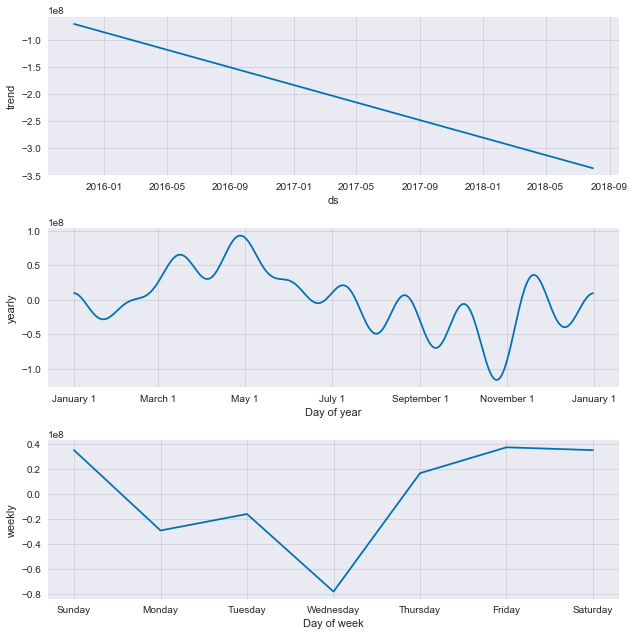

In [103]:
m.plot_components(fcst)

In [101]:
accuracy=fcst['yhat'][:len(data)].sum()/(data['y']).sum()

In [102]:
accuracy

1.0098295443556888

In [100]:
data['y']

0     -3.980060e+03
1     -7.500000e+01
2      2.327350e+03
3      1.792500e+02
4      2.341960e+03
5     -2.288230e+03
6     -2.556600e+02
7     -2.494000e+02
8     -1.517000e+02
9      3.952900e+02
10    -4.304660e+03
11     9.353270e+03
12     1.019060e+03
13     0.000000e+00
14    -5.469900e+02
15     6.300000e+00
16     3.054200e+03
17    -8.680920e+03
18     8.540000e+00
19    -5.283080e+03
20     1.411570e+03
21     8.994400e+02
22    -2.652800e+02
23     3.280000e+00
24     1.640000e+00
25    -4.054810e+03
26     2.978900e+02
27     6.261000e+01
28     4.671500e+03
29     1.811000e+01
           ...     
559   -1.025817e+08
560   -2.404062e+08
561   -1.253121e+08
562   -3.531104e+08
563   -1.877233e+08
564   -1.310849e+08
565   -2.910459e+08
566   -1.545091e+08
567   -1.005692e+08
568   -1.334212e+08
569   -2.587687e+08
570   -1.289686e+09
571   -1.273963e+08
572   -1.061191e+08
573   -7.442735e+08
574   -2.681692e+08
575   -2.015892e+08
576   -9.348834e+07
577   -7.802139e+07


In [131]:
p=pd.DataFrame()

In [115]:
p['fcst']=k

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [139]:
p.to_csv('data1.csv')

In [120]:
type(fcst)

pandas.core.frame.DataFrame

In [121]:
type(data['y'])

pandas.core.series.Series

In [132]:
k=pd.DataFrame(data['y'])

In [135]:
p['y']=k

In [133]:
p['fcst']=pd.DataFrame(fcst['yhat'])

In [138]:
p['date']=pd.DataFrame(data['ds'])